In [ ]:
!pip install mimesis
!pip install pandas
!pip install faker

#Geração da tabela com os dados

In [ ]:
import pandas as pd
from mimesis import Generic
from mimesis.locales import Locale
from faker import Faker
import random
from datetime import datetime as dt, timedelta

# Configurando a geração de dados brasileiros
generic = Generic(locale=Locale.PT_BR)
person = generic.person
address_mimesis = generic.address
finance = generic.finance
datetime = generic.datetime

# Inicializando o Faker para geração de endereços
fake = Faker('pt_BR')

# Listas de nomes e sobrenomes brasileiros
nomes_masculinos = [
    "Miguel", "Arthur", "Heitor", "Bernardo", "Davi", "Lorenzo", "Théo", "Pedro", "Gabriel", "Enzo",
    "Matheus", "Lucas", "Guilherme", "Nicolas", "Rafael", "Henrique", "Samuel", "João", "Murilo", "Eduardo",
    "Felipe", "Gustavo", "Vitor", "Daniel", "Leonardo", "Bruno", "Rodrigo", "Thiago", "Diego", "Vinícius",
    "Antonio", "Caio", "Francisco", "Ruan", "Ricardo", "Alexandre", "Isaac", "Luiz", "André", "Fernando",
    "Fábio", "Hugo", "Renato", "Paulo", "Carlos", "Cláudio", "Marcelo", "Igor", "Otávio", "Cauã",
    "Manoel", "Alberto", "Adriano", "Jonas", "Alex", "Josué", "Mário", "Sérgio", "Raul", "Christian",
    "Edson", "Wagner", "Márcio", "Evandro", "Leandro", "Rômulo", "Cláudio", "Jorge", "César", "Antônio",
    "Márcio", "Elias", "Mauro", "Rogério", "Sandro", "Washington", "Wesley", "Marcos", "Josias", "Emanuel"
]

nomes_femininos = [
    "Alice", "Sophia", "Helena", "Valentina", "Laura", "Isabella", "Manuela", "Júlia", "Heloísa", "Luiza",
    "Maria", "Lara", "Beatriz", "Mariana", "Emanuelly", "Eloá", "Giovanna", "Isadora", "Ana", "Lorena",
    "Camila", "Gabriela", "Sara", "Yasmin", "Clara", "Bianca", "Livia", "Melissa", "Marina", "Cecília",
    "Luana", "Bruna", "Nicole", "Vitória", "Larissa", "Rafaela", "Elisa", "Rebeca", "Tainá", "Débora",
    "Carolina", "Juliana", "Fernanda", "Natália", "Pietra", "Mirella", "Patrícia", "Esther", "Sophia", "Stella",
    "Amanda", "Tatiane", "Olivia", "Verônica", "Joana", "Aline", "Renata", "Daniela", "Simone", "Janaína",
    "Marcela", "Larisse", "Talita", "Selma", "Luísa", "Adriana", "Jéssica", "Sandra", "Mônica", "Fabiana",
    "Nayara", "Gisele", "Brenda", "Carla", "Luciana", "Rosana", "Vanessa", "Regina", "Érica", "Cristina"
]

sobrenomes = [
    "Silva", "Santos", "Oliveira", "Souza", "Rodrigues", "Ferreira", "Almeida", "Costa", "Gomes", "Martins",
    "Araújo", "Barbosa", "Pereira", "Carvalho", "Nascimento", "Lima", "Monteiro", "Mendes", "Barros",
    "Ribeiro", "Farias", "Campos", "Cardoso", "Teixeira", "Moreira", "Vieira", "Moura", "Cavalcanti", "Batista",
    "Dias", "Castro", "Pinto", "Guimarães", "Cruz", "Andrade", "Neves", "Moraes", "Azevedo", "Reis",
    "Freitas", "Fonseca", "Braga", "Machado", "Borges", "Vaz", "Leal", "Magalhães", "Tavares", "Xavier",
    "Bezerra", "Coelho", "Ramos", "Melo", "Alves", "Correia", "Pacheco", "Peixoto", "Macedo", "Soares",
    "Duarte", "Viana", "Brito", "Rezende", "Queiroz", "Figueiredo", "Gonçalves", "Amaral", "Benedito", "Aguiar",
    "Couto", "Bittencourt", "Menezes", "Prado", "Carmo", "Siqueira", "Porto", "Meireles", "Nogueira", "Simões",
    "Antunes", "Montenegro", "Lopes", "Assis", "Lacerda", "Sampaio", "Buarque", "Serra", "Romero", "Chaves",
    "Pimentel", "Farias", "Lins", "Vilela", "Accioly", "Pinheiro", "Vargas", "Diniz", "Silveira", "Teles",
    "Galvão", "Henriques", "Saraiva", "Barreto", "Valente", "Caldas", "Rangel", "Sales", "Manso", "Cunha"
]

# Função para gerar um nome completo e seu gênero
def gerar_nome_e_genero():
    if random.choice([True, False]):
        nome = random.choice(nomes_masculinos)
        genero = "Masculino"
    else:
        nome = random.choice(nomes_femininos)
        genero = "Feminino"
    sobrenome = random.choice(sobrenomes)
    return f"{nome} {sobrenome}", genero

# Definindo a quantidade de registros que queremos gerar
num_records = 5000

# Lista de religiões comuns no Brasil
religions = ["Catolicismo", "Protestantismo", "Espiritismo", "Umbanda", "Candomblé", "Sem religião"]
resultadoTeste = ["Normal", "Inconclusivo", "Anormal"]
condicaoMedica = ["Diabetes mellitus", "Hipertensão arterial", "Asma", "Depressão", "Ansiedade",
                  "Doença de Alzheimer", "Doença de Parkinson", "Epilepsia", "Artrite reumatoide",
                  "Osteoporose", "Doença Pulmonar Obstrutiva Crônica (DPOC)", "Insuficiência cardíaca",
                  "Doença arterial coronariana", "Hepatite C", "Doença de Crohn", "Colite ulcerativa",
                  "Esclerose múltipla", "Lúpus eritematoso sistêmico", "Doença renal crônica", "Câncer"]
planoSaude = ["Bradesco Saúde", "Amil", "Unimed", "Hapvida", "SulAmérica", "Intermédica",
              "NotreDame Intermédica", "Porto Seguro Saúde", "Plano de Saúde São Cristóvão", "Grupo NotreDame",
              "Unimed", "Prevent Senior", "São Francisco Saúde", "Hermes Pardini", "Intermédica", "SUS"]

# Hospitais gerais e especializados em câncer
hospital_geral = ["Hospital das Clínicas de São Paulo", "Hospital Israelita Albert Einstein", "Hospital Sírio-Libanês",
                  "Hospital das Clínicas de Ribeirão Preto", "Hospital de Coração (HCor)", "Hospital São Paulo (UNIFESP)",
                  "Hospital Santa Catarina", "Hospital Samaritano", "Hospital das Clínicas de Porto Alegre",
                  "Hospital Alemão Oswaldo Cruz", "Hospital de Clínicas de Curitiba", "Hospital das Clínicas de Campinas",
                  "Hospital de Clínicas de Vitória"]
hospital_cancer = ["Hospital de Câncer de Barretos", "Hospital de Câncer de São Paulo", "Hospital de Câncer de Goiânia",
                   "Hospital de Câncer de Brasília", "Hospital de Câncer de Fortaleza"]

entradaMedica = ["Urgente", "Emergência", "Eletiva", "Programada", "Internação"]

# Medicamentos específicos para condições médicas
medicamentos_condicoes = {
    "Diabetes mellitus": ["Insulina", "Metformina", "Glibenclamida"],
    "Hipertensão arterial": ["Losartana", "Captopril", "Hidroclorotiazida"],
    "Asma": ["Salbutamol", "Budesonida", "Montelucaste"],
    "Depressão": ["Fluoxetina", "Sertralina", "Amitriptilina"],
    "Ansiedade": ["Diazepam", "Clonazepam", "Buspirona"],
    "Doença de Alzheimer": ["Donepezila", "Memantina", "Rivastigmina"],
    "Doença de Parkinson": ["Levodopa", "Pramipexol", "Entacapona"],
    "Epilepsia": ["Carbamazepina", "Valproato", "Fenitoína"],
    "Artrite reumatoide": ["Metotrexato", "Prednisona", "Hidroxicloroquina"],
    "Osteoporose": ["Alendronato", "Risedronato", "Calcitonina"],
    "Doença Pulmonar Obstrutiva Crônica (DPOC)": ["Tiotrópio", "Formoterol", "Roflumilaste"],
    "Insuficiência cardíaca": ["Digoxina", "Furosemida", "Enalapril"],
    "Doença arterial coronariana": ["Atorvastatina", "Clopidogrel", "AAS"],
    "Hepatite C": ["Sofosbuvir", "Daclatasvir", "Ribavirina"],
    "Doença de Crohn": ["Mesalazina", "Azatioprina", "Infliximabe"],
    "Colite ulcerativa": ["Sulfasalazina", "Ciclosporina", "Tacrolimus"],
    "Esclerose múltipla": ["Interferon beta", "Glatirâmer", "Fingolimode"],
    "Lúpus eritematoso sistêmico": ["Hidroxicloroquina", "Ciclofosfamida", "Azatioprina"],
    "Doença renal crônica": ["Eritropoetina", "Cinacalcete", "Sevelamer"],
    "Câncer": ["Quimioterapia", "Radioterapia", "Imunoterapia"]
}

# Gerando dados
nomes = []
generos = []
enderecos = []
for _ in range(num_records):
    nome, genero = gerar_nome_e_genero()
    nomes.append(nome)
    generos.append(genero)
    enderecos.append(fake.address())  # Usando Faker para gerar endereços

def gerar_email(nome_completo):
    nome_completo = nome_completo.lower().replace(" ", ".")
    return f"{nome_completo}@example.com"

# Função para gerar uma data de admissão aleatória no ano de 2024
def gerar_data_admissao():
    start_date = dt(2024, 1, 1)  # Início de 2024
    end_date = dt(2024, 12, 31)  # Fim de 2024
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return start_date + timedelta(days=random_days)

# Função para calcular a data de alta somando entre 4 a 30 dias à data de admissão
def gerar_data_alta(data_admissao):
    dias_internacao = random.randint(4, 30)
    return data_admissao + timedelta(days=dias_internacao)

# Gerando dados atualizados com as novas regras para datas
data = {
    "Nome": nomes,
    "Gênero": generos,
    "Telefone": [person.telephone() for _ in range(num_records)],
    "E-mail": [gerar_email(nome) for nome in nomes],  # Usando o nome para gerar o email
    "Endereço": enderecos,  # Endereços gerados com Faker
    "Religião": [random.choice(religions) for _ in range(num_records)],
    "Idade": [random.randint(15, 100) for _ in range(num_records)],  # Gera uma idade aleatória entre 15 e 100 anos
    "Tipo Sanguíneo": [person.blood_type() for _ in range(num_records)],
    "Condição Médica": [random.choice(condicaoMedica) for _ in range(num_records)],  # Gerando condição médica aleatória
    "Data de Admissão": [gerar_data_admissao() for _ in range(num_records)],  # Datas de admissão no ano de 2024
    "Médico": [person.full_name() for _ in range(num_records)],
    "Plano de Saúde": [random.choice(planoSaude) for _ in range(num_records)],  # Usando palavra aleatória para nome da seguradora
    "Valor da Fatura": [finance.price(minimum=100, maximum=10000) for _ in range(num_records)],
    "Número do Quarto": [str(random.randint(20, 450)) for _ in range(num_records)],  # Gera um número de quarto aleatório
    "Tipo de Admissão": [random.choice(entradaMedica) for _ in range(num_records)],  # Gerando tipo de admissão aleatório
    "Resultado do Teste": [random.choice(resultadoTeste) for _ in range(num_records)]  # Gerando resultado de teste aleatório
}

# Adicionando a Data de Alta calculada com base na Data de Admissão
data["Data de Alta"] = [gerar_data_alta(admissao) for admissao in data["Data de Admissão"]]

# Adicionando hospitais e medicamentos específicos com validação de condição médica
hospitals = []
medications = []
for condition in data["Condição Médica"]:
    if condition == "Câncer":
        hospitals.append(random.choice(hospital_cancer))
    else:
        hospitals.append(random.choice(hospital_geral))
    medications.append(random.choice(medicamentos_condicoes[condition]))

data["Hospital"] = hospitals
data["Medicação Específica"] = medications

# Criando DataFrame
df = pd.DataFrame(data)

# Salvando o DataFrame em um arquivo CSV
csv_file = "dados_hospital_simulados.csv"
df.to_csv(csv_file, index=False)

print("Arquivo CSV gerado com sucesso!")

# Exibindo a tabela
print(df)

# Lendo e exibindo o conteúdo do CSV para confirmação
df_read = pd.read_csv(csv_file)
print("\nConteúdo do arquivo CSV:")
print(df_read)

#k-anonymity

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker

fake = Faker()

def suppress_name(name):
    """ Mascarar o nome com um único '*' """
    if pd.isna(name):
        return np.nan
    return '*'


def generalize_phone(phone, count, k):
    """ Generalize phone based on the value of k """
    if pd.isna(phone):
        return np.nan
    if count < k:
        return '*****' + phone[-2:]  # Mostrar apenas os últimos 2 dígitos
    else:
        return '***' + phone[-3:]  # Mostrar os últimos 3 dígitos

def generalize_email(email):
    """ Generalize email by showing only the provider and the domain """
    if pd.isna(email):
        return np.nan
    _, domain = email.split('@')
    return '***@' + domain  # Esconder o nome de usuário, mostrar apenas o provedor

def generalize_address(address, count, k):
    """ Generalize address based on the extracted state and k """
    if pd.isna(address):
        return np.nan
    # Extrair o estado (parte depois da última '/')
    state = address.split('/')[-1].strip()

    if count < k:
        # Trocar para a região geográfica
        region_map = {
            'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
            'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste',
            'RN': 'Nordeste', 'SE': 'Nordeste', 'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
            'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
            'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
        }
        return region_map.get(state, 'Região desconhecida')  # Mapear estado para região
    else:
        return state  # Manter o estado original

def generalize_age(age, count, k):
    """ Generalize age based on k """
    if pd.isna(age):
        return np.nan
    try:
        age = int(age)
    except ValueError:
        return np.nan

    if count < k:
        # Intervalos mais amplos
        if age <= 40:
            return '1-40'
        elif age <= 60:
            return '41-60'
        elif age <= 80:
            return '61-80'
        else:
            return '80+'
    else:
        # Intervalos menores
        if age <= 20:
            return '10-20'
        elif age <= 30:
            return '21-30'
        elif age <= 40:
            return '31-40'
        elif age <= 50:
            return '41-50'
        elif age <= 60:
            return '51-60'
        elif age <= 70:
            return '61-70'
        elif age <= 80:
            return '71-80'
        elif age <= 90:
            return '81-90'
        else:
            return '91-100'

def k_anonymize(data, k):
    """ Apply k-anonymity by generalizing quasi-identifiers based on custom rules """

    # Suprimir a coluna Nome
    data['Nome'] = data['Nome'].apply(suppress_name)

    # Extrair os estados do endereço e contar suas ocorrências
    data['Estado'] = data['Endereço'].apply(lambda x: x.split('/')[-1].strip() if pd.notna(x) else np.nan)
    counts_phone = data['Telefone'].value_counts()
    counts_email = data['E-mail'].value_counts()
    counts_state = data['Estado'].value_counts()  # Contagem por estado
    counts_age = data['Idade'].value_counts()

    # Printe as contagens para análise
    print("Contagens por Telefone:\n", counts_phone)
    print("Contagens por E-mail:\n", counts_email)
    print("Contagens por Estado (extraído do Endereço):\n", counts_state)
    print("Contagens por Idade:\n", counts_age)

    # Generalizar de acordo com as regras baseadas em K
    data['Telefone'] = data.apply(lambda row: generalize_phone(row['Telefone'], counts_phone[row['Telefone']], k), axis=1)
    data['E-mail'] = data['E-mail'].apply(generalize_email)
    data['Endereço'] = data.apply(lambda row: generalize_address(row['Endereço'], counts_state[row['Estado']], k), axis=1)
    data['Idade'] = data.apply(lambda row: generalize_age(row['Idade'], counts_age[row['Idade']], k), axis=1)

    # Remover a coluna Estado, já que ela foi usada apenas para auxiliar na contagem
    data.drop(columns=['Estado'], inplace=True)

    return data

# Carrega os dados
data = pd.read_csv('/content/dados_hospital_simulados.csv')

# Defina o valor de K aqui
k = 20  # Você pode ajustar esse valor conforme necessário

# Aplicar k-anonimidade com as regras definidas
anonimized_data = k_anonymize(data, k)

# Salvar os dados anonimizados
anonimized_data.to_csv('tabela_anonimizada_kanonymity.csv', index=False)


#Generalização

In [ ]:
import pandas as pd
import random

# Função para generalizar o nome
def generalizar_nome(index):
    return f"Paciente {index + 1}"

# Função para generalizar o telefone (mostrar apenas os 3 últimos dígitos)
def generalizar_telefone(telefone):
    if pd.isna(telefone):
        return "000-***"
    return "****" + telefone[-3:]

# Função para generalizar o e-mail (manter apenas o domínio)
def generalizar_email(email):
    if pd.isna(email):
        return "****@example.com"
    _, domain = email.split('@')
    return f"****@{domain}"

# Função para generalizar o endereço (manter apenas a sigla do estado)
def generalizar_endereco(endereco):
    if pd.isna(endereco):
        return "Estado Desconhecido"

    # Extrair o estado (a sigla que vem após a última barra '/')
    state = endereco.split('/')[-1].strip()
    return state if len(state) == 2 else "Estado Desconhecido"

# Função para generalizar a idade em intervalos de 10 em 10 até 110 anos
def generalizar_idade(idade):
    try:
        idade = int(idade)
        if idade <= 10:
            return "0-10"
        elif idade <= 20:
            return "11-20"
        elif idade <= 30:
            return "21-30"
        elif idade <= 40:
            return "31-40"
        elif idade <= 50:
            return "41-50"
        elif idade <= 60:
            return "51-60"
        elif idade <= 70:
            return "61-70"
        elif idade <= 80:
            return "71-80"
        elif idade <= 90:
            return "81-90"
        elif idade <= 100:
            return "91-100"
        else:
            return "101-110"
    except ValueError:
        return "Idade Desconhecida"

# Ler o CSV
df = pd.read_csv('dados_hospital_simulados.csv')

# Generalizar as colunas
df['Nome'] = df.index.to_series().apply(generalizar_nome)
df['Telefone'] = df['Telefone'].apply(generalizar_telefone)
df['E-mail'] = df['E-mail'].apply(generalizar_email)
df['Endereço'] = df['Endereço'].apply(generalizar_endereco)
df['Idade'] = df['Idade'].apply(generalizar_idade)

# Salvar o novo arquivo CSV
df.to_csv('tabela_anonimizada_generalizada.csv', index=False)

print("Dados generalizados e salvos com sucesso!")


#Perturbação

In [ ]:
import pandas as pd
import random
import string

# Função para perturbar o nome (alterar aleatoriamente alguns caracteres)
def perturbar_nome(nome):
    nome_perturbado = list(nome)
    for _ in range(random.randint(1, 3)):  # Alterar 1 a 3 caracteres
        index = random.randint(0, len(nome_perturbado) - 1)
        nome_perturbado[index] = random.choice(string.ascii_letters)
    return ''.join(nome_perturbado)

# Função para perturbar o telefone (alterar os últimos 3 dígitos com números aleatórios)
def perturbar_telefone(telefone):
    if len(telefone) >= 8:
        # Substitui os últimos 3 dígitos por novos números aleatórios
        return telefone[:-3] + ''.join(random.choices(string.digits, k=3))
    return telefone

# Função para perturbar o e-mail (alterar o nome de usuário, mantendo o domínio)
def perturbar_email(email):
    if '@' in email:
        nome_usuario, dominio = email.split('@')
        # Substitui o nome de usuário por um valor aleatório do mesmo comprimento
        nome_usuario_perturbado = ''.join(random.choices(string.ascii_letters + string.digits, k=len(nome_usuario)))
        return nome_usuario_perturbado + '@' + dominio
    return email

# Função para perturbar o endereço (modificar aleatoriamente uma ou mais palavras)
def perturbar_endereco(endereco):
    palavras = endereco.split()
    if len(palavras) > 1:
        # Substitui de 1 a 2 palavras aleatoriamente no endereço
        for _ in range(random.randint(1, 2)):
            index = random.randint(0, len(palavras) - 1)
            palavras[index] = ''.join(random.choices(string.ascii_letters, k=len(palavras[index])))
    return ' '.join(palavras)

# Função para perturbar a idade (adicionar ou subtrair até 5 anos, garantindo que a idade seja razoável)
def perturbar_idade(idade):
    try:
        idade = int(idade)
        perturbacao = random.randint(-5, 5)
        idade_perturbada = idade + perturbacao
        # Garantir que a idade não seja negativa ou maior que 110
        if idade_perturbada < 0:
            idade_perturbada = 0
        elif idade_perturbada > 110:
            idade_perturbada = 110
        return idade_perturbada
    except ValueError:
        return idade  # Retorna o valor original se não for um número

# Ler o CSV original
df = pd.read_csv('dados_hospital_simulados.csv')

# Aplicar a perturbação nas colunas especificadas
df['Nome'] = df['Nome'].apply(perturbar_nome)
df['Telefone'] = df['Telefone'].apply(perturbar_telefone)
df['E-mail'] = df['E-mail'].apply(perturbar_email)
df['Endereço'] = df['Endereço'].apply(perturbar_endereco)
df['Idade'] = df['Idade'].apply(perturbar_idade)

# Salvar o novo arquivo CSV com os dados perturbados
df.to_csv('tabela_anonimizada_pertubacao.csv', index=False)

print("Dados perturbados e salvos com sucesso!")


#Calculo da métrica de risco de reidentificação mensurada

Dados Originais:
              Nome     Gênero            Telefone  \
0  Leandro Tavares  Masculino    +55-21 6727-1602   
1      Joana Serra   Feminino  +55 (87) 3614-8615   

                        E-mail  \
0  leandro.tavares@example.com   
1      joana.serra@example.com   

                                            Endereço        Religião  Idade  \
0  Setor Vitória Jesus, 465\nFlavio Marques Lisbo...     Catolicismo     27   
1  Estação Martins, 44\nJardim Guanabara\n7956126...  Protestantismo     38   

  Tipo Sanguíneo     Condição Médica Data de Admissão                 Médico  \
0             O−   Colite ulcerativa       2024-03-07  Osvaldina Deschievane   
1            AB−  Artrite reumatoide       2024-10-19       Judas Pianessola   

          Plano de Saúde  Valor da Fatura  Número do Quarto Tipo de Admissão  \
0  NotreDame Intermédica          5354.13                34       Internação   
1         Bradesco Saúde           319.17               363       Programada   



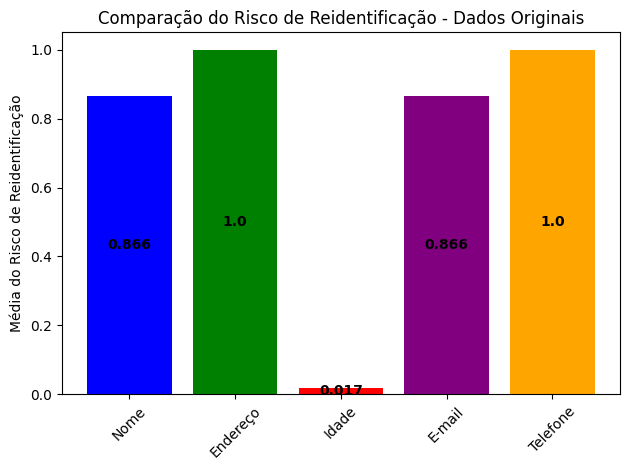

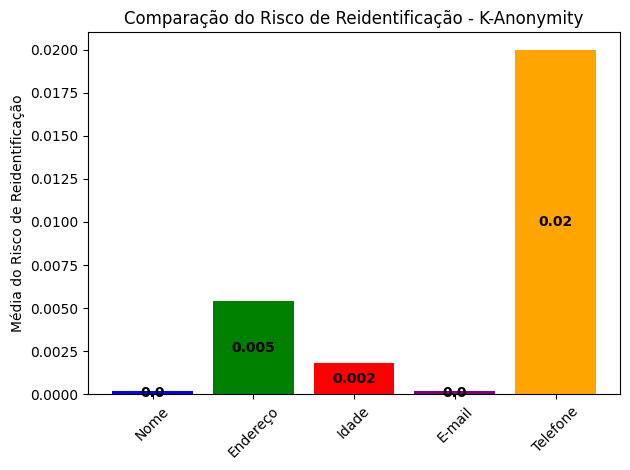

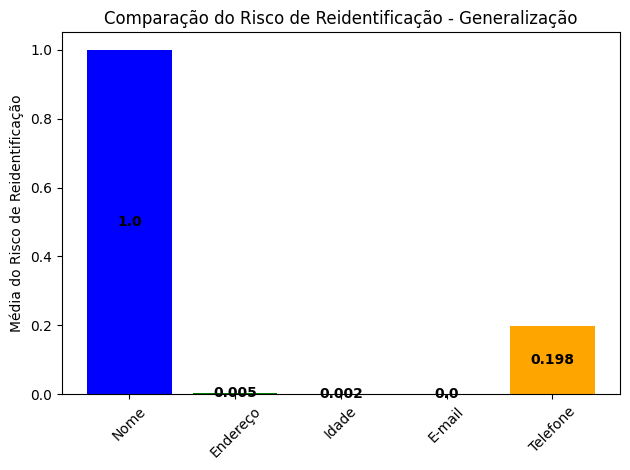

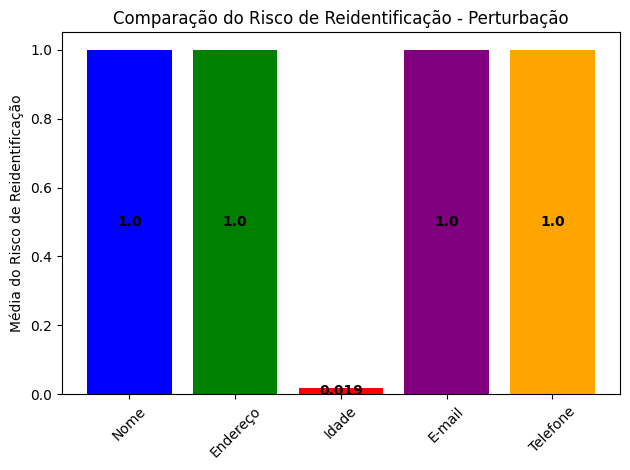

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os datasets anonimizados (substitua os caminhos pelos arquivos corretos)
dados_original = pd.read_csv('/content/dados_hospital_simulados.csv')
dados_k_anonymity = pd.read_csv('/content/tabela_anonimizada_kanonymity.csv')
dados_data_generalization = pd.read_csv('/content/tabela_anonimizada_generalizada.csv')
dados_data_pertubados = pd.read_csv('/content/tabela_anonimizada_pertubacao.csv')

# Visualizar os dados
print("Dados Originais:")
print(dados_original.head(2))

print("Dados K-Anonymity:")
print(dados_k_anonymity.head(2))

print("Dados Generalizados:")
print(dados_data_generalization.head(2))

print("Dados Perturbados:")
print(dados_data_pertubados.head(2))

# Função para calcular a equivalência de classe de uma coluna
def calcular_equivalencia_classe_coluna(df, coluna):
    # Agrupar pela coluna anonimizada e contar o tamanho de cada grupo (equivalência de classe)
    grupo = df.groupby(coluna).size().reset_index(name='equivalencia_classe')
    # Mesclar a equivalência de classe de volta ao dataframe original
    df = pd.merge(df, grupo, on=coluna, how='left')
    return df

# Função para calcular o risco de reidentificação de uma coluna
def calcular_risco_reidentificacao_coluna(df):
    # O risco é 1 dividido pela equivalência de classe
    df['risco_reidentificacao'] = 1 / df['equivalencia_classe']
    return df

# Colunas a serem anonimizadas (ajuste conforme os dados)
colunas_anonimizadas = ['Nome', 'Endereço', 'Idade', 'E-mail', 'Telefone']

# Iterar sobre cada dataset e cada coluna para calcular a equivalência de classe e o risco de reidentificação
datasets = {
    'Dados Originais': dados_original,
    'K-Anonymity': dados_k_anonymity,
    'Generalização': dados_data_generalization,
    'Perturbação': dados_data_pertubados
}

resultados = {}

for nome_dataset, df in datasets.items():
    print(f"\nAnalisando {nome_dataset}...")
    resultados_dataset = {}
    for coluna in colunas_anonimizadas:
        if coluna in df.columns:
            print(f"Calculando equivalência de classe e risco de reidentificação para a coluna: {coluna}")
            df_coluna = calcular_equivalencia_classe_coluna(df[[coluna]].copy(), coluna)
            df_coluna = calcular_risco_reidentificacao_coluna(df_coluna)
            media_risco = df_coluna['risco_reidentificacao'].mean()
            resultados_dataset[coluna] = media_risco
            print(f"Média do Risco de Reidentificação para a coluna {coluna}: {media_risco}")
        else:
            print(f"A coluna {coluna} não está presente no dataset.")

    resultados[nome_dataset] = resultados_dataset

# Comparar as médias do risco de reidentificação entre diferentes técnicas e colunas
cores = ['blue', 'green', 'red', 'purple', 'orange']  # Definir uma lista de cores para cada coluna

for nome_dataset, riscos in resultados.items():
    plt.figure()
    colunas = list(riscos.keys())
    medias_risco = list(riscos.values())

    # Plotar o gráfico de barras com cores diferentes para cada coluna
    barras = plt.bar(colunas, medias_risco, color=cores[:len(colunas)])

    # Adicionar o valor dentro de cada barra
    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width() / 2, yval / 2, round(yval, 3), ha='center', va='center', color='black', fontweight='bold')

    # Configurações do gráfico
    plt.title(f'Comparação do Risco de Reidentificação - {nome_dataset}')
    plt.ylabel('Média do Risco de Reidentificação')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Salvar o gráfico em imagem (PNG)
    plt.savefig(f'comparacao_risco_{nome_dataset}.png')

    # Exibir o gráfico
    plt.show()


In [ ]:
import pandas as pd
from IPython.display import display

# Carregue o arquivo CSV
df = pd.read_csv('tabela_anonimizada_kanonimity.csv')

# Selecione as colunas desejadas
colunas_desejadas = ['Nome', 'Endereço', 'Idade', 'E-mail', 'Telefone']
df_selecionado = df[colunas_desejadas]

# Exiba o DataFrame resultante como uma tabela
display(df_selecionado)
